In [ ]:
!pip install google-cloud-storage

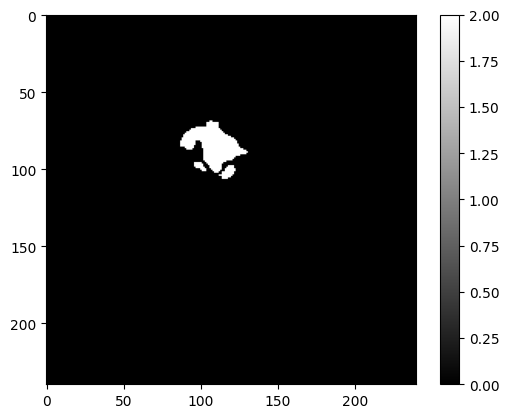

In [40]:
from google.cloud import storage
import nibabel as nib
import os
import matplotlib.pyplot as plt

"""Download an image from Google Cloud Storage"""
key_file_path = os.path.join("keys", "zinc-citron-387817-2cbfd8289ed2.json")
bucket_name = 'rice_d2k_biocv'
blob_name = os.path.join("data", "automated_segm", "UPENN-GBM-00001_11_automated_approx_segm.nii.gz")

temp_file_name = os.path.join("temp_files", "UPENN-GBM-00001_11_automated_approx_segm.nii.gz")
storage_client = storage.Client.from_service_account_json(key_file_path)

bucket = storage_client.bucket(bucket_name)
blob = bucket.blob(blob_name)
blob.download_to_filename(temp_file_name)
nifti_image = nib.load(temp_file_name)
data = nifti_image.get_fdata()

os.remove(temp_file_name)
# Plot the image
plt.imshow(data[:, :, 54], cmap='gray')
plt.colorbar()
plt.show()